In [1]:
import pandas as pd

# 2. Grouping and summing

In [2]:
df = pd.read_excel('pfsu-data/movie theater sales data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 4 columns):
theater_name       1155 non-null object
movie_title        1155 non-null object
ticket_type        1155 non-null object
ticket_quantity    1155 non-null int64
dtypes: int64(1), object(3)
memory usage: 36.2+ KB


In [3]:
df.head()

,theater_name,movie_title,ticket_type,ticket_quantity
0,Sumdance Cinemas,Harry Plotter,senior,4
1,The Empirical House,10 Things I Hate About Unix,child,2
2,The Empirical House,The Seaborn Identity,adult,4
3,Sumdance Cinemas,10 Things I Hate About Unix,adult,2
4,The Empirical House,Mamma Median!,senior,2


In [4]:
df.sum(numeric_only=True)

ticket_quantity    2305
dtype: int64

In [5]:
df.groupby('theater_name').sum()

,ticket_quantity
theater_name,
Richie's Famous Minimax Theatre,572
Sumdance Cinemas,584
The Empirical House,554
The Frame,595


In [6]:
df.groupby('movie_title').sum()

,ticket_quantity
movie_title,
10 Things I Hate About Unix,331
Harry Plotter,292
Kung Fu pandas,253
Mamma Median!,323
The Matrices,343
The Seaborn Identity,352
The Sumif All Fears,156
There's Something About Merging,149
While You Were Sorting,106


# 2.1. Grouping by multiple columns

In [7]:
groups=['theater_name','ticket_type']
df.groupby(groups).sum()

ticket_quantity
theater_name                    ticket_type                 
Richie's Famous Minimax Theatre adult                    334
                                child                    116
                                senior                   122
Sumdance Cinemas                adult                    330
                                child                    153
                                senior                   101
The Empirical House             adult                    356
                                child                     95
                                senior                   103
The Frame                       adult                    363
                                child                    123
                                senior                   109

In [8]:
groups=['theater_name','ticket_type']
df.groupby(groups, as_index=False).sum()

,theater_name,ticket_type,ticket_quantity
0,Richie's Famous Minimax Theatre,adult,334
1,Richie's Famous Minimax Theatre,child,116
2,Richie's Famous Minimax Theatre,senior,122
3,Sumdance Cinemas,adult,330
4,Sumdance Cinemas,child,153
5,Sumdance Cinemas,senior,101
6,The Empirical House,adult,356
7,The Empirical House,child,95
8,The Empirical House,senior,103
9,The Frame,adult,363


In [9]:
groups=['theater_name','ticket_type']
df.groupby(groups, as_index=False).sum().sort_values('ticket_quantity', ascending=False)

,theater_name,ticket_type,ticket_quantity
9,The Frame,adult,363
6,The Empirical House,adult,356
0,Richie's Famous Minimax Theatre,adult,334
3,Sumdance Cinemas,adult,330
4,Sumdance Cinemas,child,153
10,The Frame,child,123
2,Richie's Famous Minimax Theatre,senior,122
1,Richie's Famous Minimax Theatre,child,116
11,The Frame,senior,109
8,The Empirical House,senior,103


Top **ticket type** for each theater

In [10]:
groups=['theater_name','ticket_type']

df.groupby(groups, as_index=False).sum().sort_values('ticket_quantity', ascending=False)\
    .groupby('theater_name').head(1).reset_index(drop=True)

,theater_name,ticket_type,ticket_quantity
0,The Frame,adult,363
1,The Empirical House,adult,356
2,Richie's Famous Minimax Theatre,adult,334
3,Sumdance Cinemas,adult,330


# 2.2. Condense information

In [11]:
df.groupby('theater_name').mean()

,ticket_quantity
theater_name,
Richie's Famous Minimax Theatre,2.028369
Sumdance Cinemas,1.966330
The Empirical House,1.985663
The Frame,2.003367


# 3. Working with multiple sheets

In [12]:
excel = pd.ExcelFile('pfsu-data/movie theater sales data.xlsx')
excel

In [13]:
excel.sheet_names

['sales', 'ticket types', 'theaters', 'movies']

In [14]:
sales = excel.parse('sales')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 4 columns):
theater_name       1155 non-null object
movie_title        1155 non-null object
ticket_type        1155 non-null object
ticket_quantity    1155 non-null int64
dtypes: int64(1), object(3)
memory usage: 36.2+ KB


In [15]:
sales['theater_name'].str.upper().head()

0       SUMDANCE CINEMAS
1    THE EMPIRICAL HOUSE
2    THE EMPIRICAL HOUSE
3       SUMDANCE CINEMAS
4    THE EMPIRICAL HOUSE
Name: theater_name, dtype: object

In [16]:
sales['theater_name'].str.lower().head()

0       sumdance cinemas
1    the empirical house
2    the empirical house
3       sumdance cinemas
4    the empirical house
Name: theater_name, dtype: object

In [17]:
sales['theater_name'].str.lower().str.title().head()

0       Sumdance Cinemas
1    The Empirical House
2    The Empirical House
3       Sumdance Cinemas
4    The Empirical House
Name: theater_name, dtype: object

In [18]:
sales['theater_name'].str.strip().head()

0       Sumdance Cinemas
1    The Empirical House
2    The Empirical House
3       Sumdance Cinemas
4    The Empirical House
Name: theater_name, dtype: object

# 3.1. Merging: VLOOKUP of Python

In [19]:
tickets = excel.parse('ticket types')
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
ticket_type     3 non-null object
ticket_price    3 non-null int64
dtypes: int64(1), object(1)
memory usage: 128.0+ bytes


In [20]:
tickets

,ticket_type,ticket_price
0,child,8
1,adult,20
2,senior,12


In [21]:
theaters = excel.parse('theaters')
theaters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
theater_name        4 non-null object
theater_location    4 non-null object
dtypes: object(2)
memory usage: 144.0+ bytes


In [22]:
theaters

,theater_name,theater_location
0,The Empirical House,New York
1,Sumdance Cinemas,Los Angeles
2,The Frame,Portland
3,Richie's Famous Minimax Theatre,Los Angeles


In [23]:
movies = excel.parse('movies')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
movie_title     9 non-null object
movie_genre     9 non-null object
movie_length    9 non-null int64
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [24]:
movies

,movie_title,movie_genre,movie_length
0,The Sumif All Fears,Action,124
1,The Seaborn Identity,Action,119
2,The Matrices,Action,136
3,There's Something About Merging,Comedy,119
4,Mamma Median!,Comedy,108
5,Harry Plotter,Kids,159
6,Kung Fu pandas,Kids,92
7,While You Were Sorting,Romance,103
8,10 Things I Hate About Unix,Romance,97


In [25]:
df = sales.merge(tickets, on='ticket_type', how='left')
df.head()

,theater_name,movie_title,ticket_type,ticket_quantity,ticket_price
0,Sumdance Cinemas,Harry Plotter,senior,4,12
1,The Empirical House,10 Things I Hate About Unix,child,2,8
2,The Empirical House,The Seaborn Identity,adult,4,20
3,Sumdance Cinemas,10 Things I Hate About Unix,adult,2,20
4,The Empirical House,Mamma Median!,senior,2,12


In [26]:
df = df.merge(theaters, on='theater_name', how='left')
df.head()

,theater_name,movie_title,ticket_type,ticket_quantity,ticket_price,theater_location
0,Sumdance Cinemas,Harry Plotter,senior,4,12,Los Angeles
1,The Empirical House,10 Things I Hate About Unix,child,2,8,New York
2,The Empirical House,The Seaborn Identity,adult,4,20,New York
3,Sumdance Cinemas,10 Things I Hate About Unix,adult,2,20,Los Angeles
4,The Empirical House,Mamma Median!,senior,2,12,New York


In [27]:
df = df.merge(movies, on='movie_title', how='left')
df.head()

,theater_name,movie_title,ticket_type,ticket_quantity,ticket_price,theater_location,movie_genre,movie_length
0,Sumdance Cinemas,Harry Plotter,senior,4,12,Los Angeles,Kids,159
1,The Empirical House,10 Things I Hate About Unix,child,2,8,New York,Romance,97
2,The Empirical House,The Seaborn Identity,adult,4,20,New York,Action,119
3,Sumdance Cinemas,10 Things I Hate About Unix,adult,2,20,Los Angeles,Romance,97
4,The Empirical House,Mamma Median!,senior,2,12,New York,Comedy,108


# 4. Visualization

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
totals = df.groupby('theater_name', as_index=False).sum()
totals['revenue'] = totals['ticket_quantity'] * totals['ticket_price']
totals = totals.sort_values('revenue', ascending=False)
totals

,theater_name,ticket_quantity,ticket_price,movie_length,revenue
3,The Frame,595,4760,35643,2832200
1,Sumdance Cinemas,584,4636,34379,2707424
0,Richie's Famous Minimax Theatre,572,4472,33400,2557984
2,The Empirical House,554,4552,33607,2521808


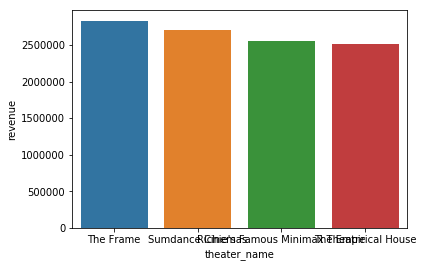

In [30]:
sns.barplot(x='theater_name', y='revenue', data=totals)
plt.savefig('pfsu-data/awesome_plot.png')

plt.show()

# 4.1. Barplot

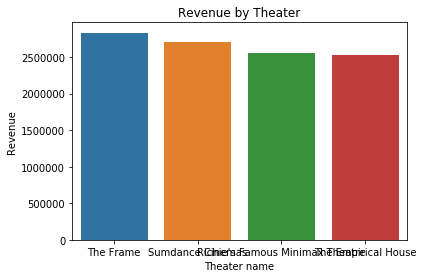

In [31]:
sns.barplot(x='theater_name', y='revenue', data=totals)
plt.title('Revenue by Theater')
plt.xlabel('Theater name')
plt.ylabel('Revenue')
plt.savefig('pfsu-data/awesome_plot.png')

plt.show()

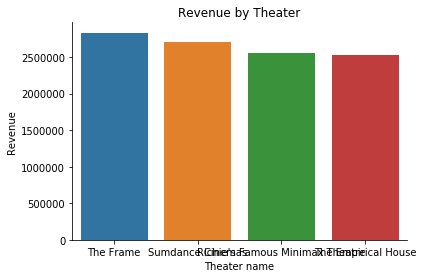

In [32]:
sns.barplot(x='theater_name', y='revenue', data=totals)
plt.title('Revenue by Theater')
plt.xlabel('Theater name')
plt.ylabel('Revenue')
sns.despine()
plt.savefig('pfsu-data/awesome_plot.png')

plt.show()

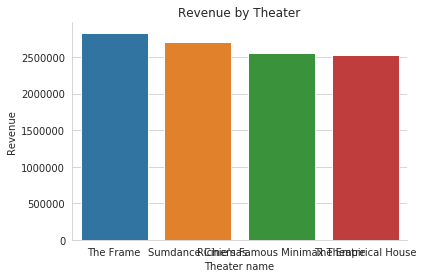

In [33]:
sns.set_style('whitegrid')
sns.barplot(x='theater_name', y='revenue', data=totals)
plt.title('Revenue by Theater')
plt.xlabel('Theater name')
plt.ylabel('Revenue')
sns.despine()
plt.savefig('pfsu-data/awesome_plot.png')

plt.show()

# 4.2. Hue

In [34]:
totals2 = df.groupby(['theater_name','movie_title'], as_index=False).sum()
totals2['revenue'] = totals2['ticket_quantity'] * totals2['ticket_price']
totals2.head()

,theater_name,movie_title,ticket_quantity,ticket_price,movie_length,revenue
0,Richie's Famous Minimax Theatre,10 Things I Hate About Unix,74,572,3686,42328
1,Richie's Famous Minimax Theatre,Harry Plotter,59,524,5088,30916
2,Richie's Famous Minimax Theatre,Kung Fu pandas,61,544,3036,33184
3,Richie's Famous Minimax Theatre,Mamma Median!,89,656,4212,58384
4,Richie's Famous Minimax Theatre,The Matrices,97,708,6256,68676


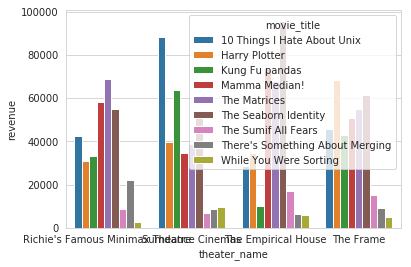

In [35]:
sns.barplot(x='theater_name', y='revenue', data=totals2, hue='movie_title')
plt.show()

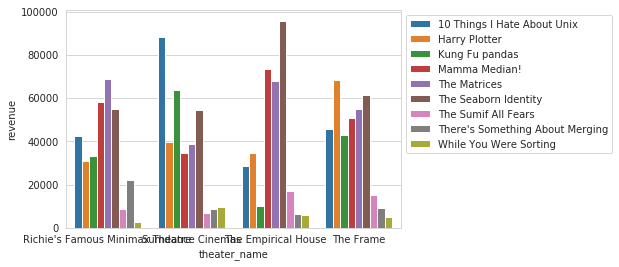

In [36]:
sns.barplot(x='theater_name', y='revenue', data=totals2, hue='movie_title')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

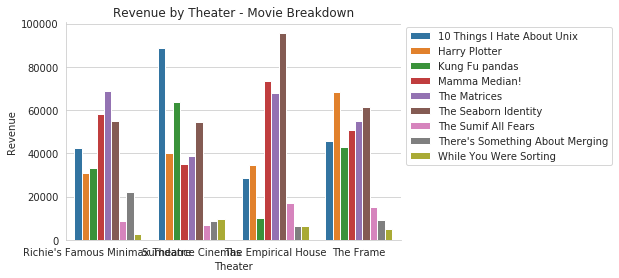

In [37]:
sns.set_style('whitegrid')
sns.barplot(x='theater_name', y='revenue', data=totals2, hue='movie_title')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Revenue by Theater - Movie Breakdown')
plt.xlabel('Theater')
plt.ylabel('Revenue')
sns.despine()

plt.show()